In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install sklearn
# %pip install imblearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.multiclass import OneVsRestClassifier
from collections import Counter

from sklearn.svm import SVC
from sklearn import metrics

import time

In [2]:
df = pd.read_csv('../data/grouped_data.csv')

In [3]:
df.head()

,gene_id,transcript_id,transcript_position,sevenmers,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,512,ATAACTC,0,0.00266,0.0169,0.007247,0.00599,0.004404,...,T,A,A,C,T,C,3,2,0,2
1,ENSG00000000003,ENST00000373020,689,TAAACAA,0,0.00232,0.0279,0.009868,0.00764,0.006946,...,A,A,A,C,A,A,5,1,0,1
2,ENSG00000000003,ENST00000373020,823,ATAACAA,0,0.00299,0.0196,0.007456,0.00631,0.003799,...,T,A,A,C,A,A,5,1,0,1
3,ENSG00000000003,ENST00000373020,830,ATAACCA,0,0.00266,0.0226,0.007765,0.00641,0.004869,...,T,A,A,C,C,A,4,2,0,1
4,ENSG00000000003,ENST00000373020,849,GTAACCC,0,0.00332,0.0181,0.006785,0.00598,0.003115,...,T,A,A,C,C,C,2,3,1,1


In [4]:
features_nominal = ['sevenmers', 'order_1', 'order_2', 'order_3', 'order_4', 'order_5', 'order_6', 'order_7']
for name in features_nominal:
    df[name] = df[name].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121838 entries, 0 to 121837
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   gene_id                 121838 non-null  object  
 1   transcript_id           121838 non-null  object  
 2   transcript_position     121838 non-null  int64   
 3   sevenmers               121838 non-null  category
 4   label                   121838 non-null  int64   
 5   dwelling_time_1_min     121838 non-null  float64 
 6   dwelling_time_1_max     121838 non-null  float64 
 7   dwelling_time_1_mean    121838 non-null  float64 
 8   dwelling_time_1_median  121838 non-null  float64 
 9   dwelling_time_1_std     121838 non-null  float64 
 10  dwelling_time_1_skew    121838 non-null  float64 
 11  sd_current_1_min        121838 non-null  float64 
 12  sd_current_1_max        121838 non-null  float64 
 13  sd_current_1_mean       121838 non-null  float64 
 14  sd_c

# Train Test Split

In [6]:
splitter = GroupShuffleSplit(test_size=.20, n_splits=1, random_state=42)
split = splitter.split(df, groups=df['gene_id'])
train_inds, test_inds = next(split)

train = df.iloc[train_inds]
test = df.iloc[test_inds]

In [7]:
train

,gene_id,transcript_id,transcript_position,sevenmers,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
13,ENSG00000000419,ENST00000371582,105,AGAACAA,0,0.00332,0.0288,0.012129,0.009860,0.006529,...,G,A,A,C,A,A,5,1,1,0
14,ENSG00000000419,ENST00000371582,147,AGAACCT,0,0.00217,0.0222,0.008839,0.007625,0.005117,...,G,A,A,C,C,T,3,2,1,1
15,ENSG00000000419,ENST00000371582,242,GGAACAA,0,0.00291,0.0214,0.006908,0.005460,0.004029,...,G,A,A,C,A,A,4,1,2,0
16,ENSG00000000419,ENST00000371582,259,TGAACAG,0,0.00427,0.0218,0.010699,0.008300,0.005605,...,G,A,A,C,A,G,3,1,2,1
17,ENSG00000000419,ENST00000371582,285,CAGACAG,0,0.00232,0.0159,0.005876,0.004980,0.003735,...,A,G,A,C,A,G,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121732,ENSG00000284493,ENST00000639558,1890,AGAACAA,0,0.00166,0.0252,0.007024,0.006310,0.004355,...,G,A,A,C,A,A,5,1,1,0
121733,ENSG00000284493,ENST00000639558,2098,GGGACAT,0,0.00232,0.0262,0.009024,0.008100,0.005060,...,G,G,A,C,A,T,2,1,3,1
121734,ENSG00000284493,ENST00000639558,2182,CAAACAC,0,0.00232,0.0360,0.008844,0.007200,0.006493,...,A,A,A,C,A,C,4,3,0,0
121735,ENSG00000284493,ENST00000639558,2273,CTGACCT,0,0.00232,0.0206,0.006297,0.005200,0.003589,...,T,G,A,C,C,T,1,3,1,2


In [8]:
test

,gene_id,transcript_id,transcript_position,sevenmers,label,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
0,ENSG00000000003,ENST00000373020,512,ATAACTC,0,0.00266,0.0169,0.007247,0.005990,0.004404,...,T,A,A,C,T,C,3,2,0,2
1,ENSG00000000003,ENST00000373020,689,TAAACAA,0,0.00232,0.0279,0.009868,0.007640,0.006946,...,A,A,A,C,A,A,5,1,0,1
2,ENSG00000000003,ENST00000373020,823,ATAACAA,0,0.00299,0.0196,0.007456,0.006310,0.003799,...,T,A,A,C,A,A,5,1,0,1
3,ENSG00000000003,ENST00000373020,830,ATAACCA,0,0.00266,0.0226,0.007765,0.006410,0.004869,...,T,A,A,C,C,A,4,2,0,1
4,ENSG00000000003,ENST00000373020,849,GTAACCC,0,0.00332,0.0181,0.006785,0.005980,0.003115,...,T,A,A,C,C,C,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121833,ENSG00000284707,ENST00000641784,3122,CTGACCC,1,0.00232,0.0438,0.007506,0.005475,0.006832,...,T,G,A,C,C,C,1,4,1,1
121834,ENSG00000284707,ENST00000641784,3142,CTGACCC,0,0.00232,0.0259,0.008712,0.007640,0.004966,...,T,G,A,C,C,C,1,4,1,1
121835,ENSG00000284707,ENST00000641784,3224,GGGACTG,1,0.00232,0.0266,0.008452,0.006970,0.005276,...,G,G,A,C,T,G,1,1,4,1
121836,ENSG00000284707,ENST00000641784,3243,GGAACAA,0,0.00204,0.0372,0.008700,0.007350,0.006147,...,G,A,A,C,A,A,4,1,2,0


In [9]:
a = train.gene_id.unique()
b = test.gene_id.unique()

set(a).intersection(b) # no overlapping gene_id, correct

set()

In [10]:
X_train = train.drop(columns = ['label', 'sevenmers'])
y_train = train['label']
X_test = test.drop(columns = ['label', 'sevenmers'])
y_test = test['label']

In [11]:
X_train

,gene_id,transcript_id,transcript_position,dwelling_time_1_min,dwelling_time_1_max,dwelling_time_1_mean,dwelling_time_1_median,dwelling_time_1_std,dwelling_time_1_skew,sd_current_1_min,...,order_2,order_3,order_4,order_5,order_6,order_7,count_A,count_C,count_G,count_T
13,ENSG00000000419,ENST00000371582,105,0.00332,0.0288,0.012129,0.009860,0.006529,1.014144,4.860,...,G,A,A,C,A,A,5,1,1,0
14,ENSG00000000419,ENST00000371582,147,0.00217,0.0222,0.008839,0.007625,0.005117,0.941203,3.770,...,G,A,A,C,C,T,3,2,1,1
15,ENSG00000000419,ENST00000371582,242,0.00291,0.0214,0.006908,0.005460,0.004029,1.967847,2.620,...,G,A,A,C,A,A,4,1,2,0
16,ENSG00000000419,ENST00000371582,259,0.00427,0.0218,0.010699,0.008300,0.005605,0.763647,4.970,...,G,A,A,C,A,G,3,1,2,1
17,ENSG00000000419,ENST00000371582,285,0.00232,0.0159,0.005876,0.004980,0.003735,1.609819,2.190,...,A,G,A,C,A,G,3,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121732,ENSG00000284493,ENST00000639558,1890,0.00166,0.0252,0.007024,0.006310,0.004355,1.510328,0.971,...,G,A,A,C,A,A,5,1,1,0
121733,ENSG00000284493,ENST00000639558,2098,0.00232,0.0262,0.009024,0.008100,0.005060,1.133221,1.530,...,G,G,A,C,A,T,2,1,3,1
121734,ENSG00000284493,ENST00000639558,2182,0.00232,0.0360,0.008844,0.007200,0.006493,2.442477,0.909,...,A,A,A,C,A,C,4,3,0,0
121735,ENSG00000284493,ENST00000639558,2273,0.00232,0.0206,0.006297,0.005200,0.003589,1.775921,1.970,...,T,G,A,C,C,T,1,3,1,2


In [12]:
# one hot encode the categories
features_nominal = ['order_1', 'order_2', 'order_3', 'order_4', 'order_5', 'order_6', 'order_7']
X_train = pd.get_dummies(X_train, columns=features_nominal)
X_test = pd.get_dummies(X_test, columns=features_nominal)

In [13]:
print([x for x in X_train.columns])

['gene_id', 'transcript_id', 'transcript_position', 'dwelling_time_1_min', 'dwelling_time_1_max', 'dwelling_time_1_mean', 'dwelling_time_1_median', 'dwelling_time_1_std', 'dwelling_time_1_skew', 'sd_current_1_min', 'sd_current_1_max', 'sd_current_1_mean', 'sd_current_1_median', 'sd_current_1_std', 'sd_current_1_skew', 'mean_current_1_min', 'mean_current_1_max', 'mean_current_1_mean', 'mean_current_1_median', 'mean_current_1_std', 'mean_current_1_skew', 'dwelling_time_2_min', 'dwelling_time_2_max', 'dwelling_time_2_mean', 'dwelling_time_2_median', 'dwelling_time_2_std', 'dwelling_time_2_skew', 'sd_current_2_min', 'sd_current_2_max', 'sd_current_2_mean', 'sd_current_2_median', 'sd_current_2_std', 'sd_current_2_skew', 'mean_current_2_min', 'mean_current_2_max', 'mean_current_2_mean', 'mean_current_2_median', 'mean_current_2_std', 'mean_current_2_skew', 'dwelling_time_3_min', 'dwelling_time_3_max', 'dwelling_time_3_mean', 'dwelling_time_3_median', 'dwelling_time_3_std', 'dwelling_time_3_sk

# Resampling

In [14]:
# oversample and undersample such that ratio of minority to majority samples becomes 3:4
# input: df, df (X_train, y_train)
# output: df, df (resampled version)
def resample(X_train, y_train):
    # define oversampling strategy so that ratio of minority samples to majority samples is 1:2
    oversample = RandomOverSampler(sampling_strategy=0.5, random_state=42)
    X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
    
    # define undersampling strategy so that the ratio of minority to majority samples becomes 3:4
    under = RandomUnderSampler(sampling_strategy=0.75)
    # fit and apply the transform
    X_train_under, y_train_under = under.fit_resample(X_train_over, y_train_over)
    return X_train_under, y_train_under

In [15]:
X_train_resampled, y_train_resampled = resample(X_train, y_train)

<AxesSubplot: >

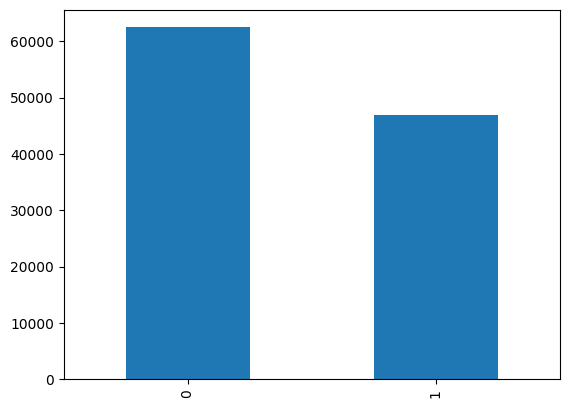

In [16]:
y_train_resampled.value_counts().plot(kind="bar")

# Train Model

In [18]:
X_train_resampled = X_train_resampled.set_index(['gene_id', 'transcript_id'])
X_test = X_test.set_index(['gene_id', 'transcript_id'])

In [19]:
sc = StandardScaler()
sc.fit(X_train_resampled)
X_train_std = sc.transform(X_train_resampled)
X_test_std = sc.transform(X_test)

In [20]:
start_time = time.time()
clf = OneVsRestClassifier(SVC(probability=True, cache_size=1000), n_jobs=-1).fit(X_train_std, y_train_resampled)
print("--- %s seconds ---" % (time.time() - start_time))

# cache 500,  njobs -1 --> 227.63 secs
# cache 1000, njobs -1 --> 192.95 secs

# full data: 108 mins

--- 6523.267036914825 seconds ---


In [21]:
y_predict = clf.predict(X_test_std)

print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.922


In [22]:
print(metrics.confusion_matrix(y_test, y_predict))
# TN FP
# FN TP

print(f'precision: {metrics.precision_score(y_test, y_predict)}')
print(f'recall:    {metrics.recall_score(y_test, y_predict)}')
print(f'roc auc:   {metrics.roc_auc_score(y_test, y_predict)}')
print(f'pr auc:    {metrics.average_precision_score(y_test, y_predict)}')

[[21100  1548]
 [  316   868]]
precision: 0.35927152317880795
recall:    0.7331081081081081
roc auc:   0.8323788509456118
pr auc:    0.2766443497027369


In [24]:
pd.DataFrame(clf.predict_proba(X_test_std)).describe()

,0,1
count,2.383200e+04,23832.000000
mean,8.826662e-01,0.117334
std,2.451543e-01,0.245154
min,1.385593e-08,0.000004
25%,9.312062e-01,0.003303
50%,9.868439e-01,0.013156
75%,9.966971e-01,0.068794
max,9.999962e-01,1.000000
